[View in Colaboratory](https://colab.research.google.com/github/meaninginuse/work/blob/master/Portfolio%20Optimization_FANG.ipynb)

In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
#pyplot had to be imported

In [0]:
!pip install -q pandas_datareader
import pandas_datareader as web
#install package each time - can't call pandas directly

In [0]:
symbols = ['FB', 'AAPL', 'NFLX', 'GOOG']
noa = len(symbols)


In [0]:
start = datetime.datetime(2017, 10, 2)

In [0]:
end = datetime.datetime(2018, 10, 3)

In [102]:
f = web.DataReader('GOOG', 'iex', start, end)
f.head(1)

,open,high,low,close,volume
date,,,,,
2017-10-02,959.98,962.54,947.84,953.27,1283444


In [0]:
data = pd.DataFrame()
for sym in symbols:
 data[sym] = web.DataReader(sym, data_source='iex', start=start, end=end)['close']
data.columns = symbols

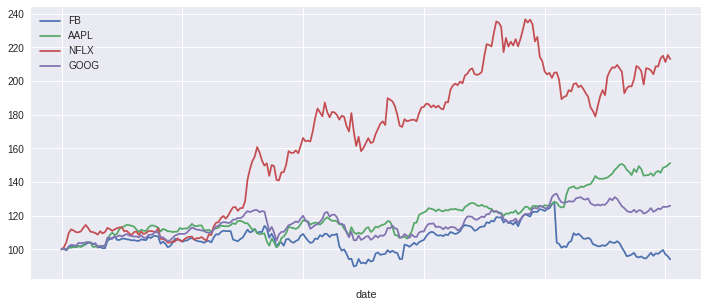

In [108]:
(data / data.iloc[0] * 100).plot(figsize=(12, 5))
#ix is depreciated


In [105]:
rets = np.log(data / data.shift(1))
#new column for returns based on position above
rets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2017-10-02 to 2018-10-02
Data columns (total 4 columns):
FB      252 non-null float64
AAPL    252 non-null float64
NFLX    252 non-null float64
GOOG    252 non-null float64
dtypes: float64(4)
memory usage: 9.9+ KB


In [109]:
rets.mean() * 252

FB     -0.061698
AAPL    0.414233
NFLX    0.756410
GOOG    0.230270
dtype: float64

In [110]:
rets.cov() * 252


,FB,AAPL,NFLX,GOOG
FB,0.118510,0.025951,0.048481,0.042925
AAPL,0.025951,0.047388,0.029335,0.029632
NFLX,0.048481,0.029335,0.139231,0.045691
GOOG,0.042925,0.029632,0.045691,0.052571


In [0]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [112]:
weights

array([0.17223814, 0.25978056, 0.40912281, 0.15885848])

In [113]:
np.sum(rets.mean() * weights) * 252

0.44302792858924217

In [114]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))


0.05746968094588763

In [115]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


0.23972834823167583

In [0]:
prets = []
pvols = []
for p in range (2500):
 weights = np.random.random(noa)
 weights /= np.sum(weights)
 prets.append(np.sum(rets.mean() * weights) * 252)
 pvols.append(np.sqrt(np.dot(weights.T,
 np.dot(rets.cov() * 252, weights))))
  
prets = np.array(prets)
pvols = np.array(pvols)



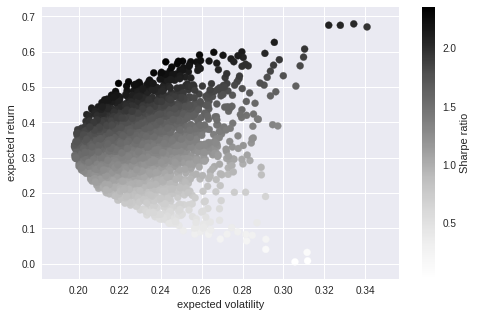

In [137]:
plt.figure(figsize=(8, 5))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [0]:
palt?